Prendre en compte le nombre de risque pris en compte ? 

Faire varier le niveau de changement de température ? (Par exemple, RCPX.X ? )

Comment prendre en compte l'équité inter-temporelle : taux d'actualisation

Comment prendre en compte la valeur de la vie ? => indice de GINI inter-national

Comment prendre en compte les inégalités sociales ? 

Prise en compte de phénomènes non-monétaires ? 

Quelle est ma question dans cette partie ? 

### Dans l'article de Gillingham : 

Input : 
- population growth
- GDP growth rate
- climate sensitivity

Output: 
- CO2 concentration
- Temperature
- Output (GDP)
- Output log 
- Emissions
- Population
- Radiative Forcings
- Damages
- SCC

=> moi ce qui m'intéresse en output c'est les domages (niveau, répartition, etc.). Et même ce qui m'intéresse c'est quels inputs font varier le plus ces domages. 

Pour ça, il y a plusieurs choses : 

Des variables en input
La forme des fonctions de dommage
Leur niveau de désagrégation (spatiale, par risque)

Ce à quoi il faut que je réflechisse, c'est comment faire des runs qui permettent de refleter ces différents choix. 

In [10]:
import pandas as pd
import xarray as xr
import numpy as np

In [7]:
variables = pd.read_csv('../../../variables.csv')
variables_interest = variables[variables['isEquation']==True]
variables_interest.head()

,Unnamed: 0,Real Name,Py Name,Subscripts,Units,Limits,Type,Subtype,Comment,Model,Equation,isEquation
3,3,DEFINE: 46: EQ damage function,define_46_eq_damage_function,NaN,NaN,"(nan, nan)",Auxiliary,Normal,NaN,DEFINE,46,True
8,8,DICE: 5: EQ damage function,dice_5_eq_damage_function,NaN,NaN,"(nan, nan)",Auxiliary,Normal,NaN,DICE,5,True
11,11,DICE: 6: EQ abatment function,dice_6_eq_abatment_function,NaN,NaN,"(nan, nan)",Auxiliary,Normal,NaN,DICE,6,True
16,16,DSK: A.128: EQ shock from climate change,dsk_a128_eq_shock_from_climate_change,NaN,NaN,"(nan, nan)",Constant,Normal,TODO,DSK,A.128,True
19,19,FUND: A.1: EQ Total agricultural impact,fund_a1_eq_total_agricultural_impact,['REGIONS 35 I'],NaN,"(nan, nan)",Auxiliary,Normal,NaN,FUND,A.1,True


In [8]:
df_df = pd.read_csv('../../../df_airtable.csv')
df_df['Model'] = df_df['Model - new table'].apply(lambda x: x.split(' ')[0])

variables_interest['Model'] = variables_interest['Model'].str.strip()
variables_interest['Equation'] = variables_interest['Equation'].str.strip()

df_df['Model'] = df_df['Model'].str.strip()
df_df['Equation number'] = df_df['Equation number'].str.strip() 

merged = variables_interest.merge(df_df, left_on=['Model', 'Equation'], right_on=['Model', 'Equation number'], how='left')
merged.head()

C:\Users\gabriel.genelot\AppData\Local\Temp\ipykernel_14012\359772982.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variables_interest['Model'] = variables_interest['Model'].str.strip()
C:\Users\gabriel.genelot\AppData\Local\Temp\ipykernel_14012\359772982.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variables_interest['Equation'] = variables_interest['Equation'].str.strip()


,Unnamed: 0,Real Name,Py Name,Subscripts,Units,Limits,Type,Subtype,Comment,Model,...,Equation shape,Formule,Equation form,Zotero reference,IPCC risks,Input categories,Output categories,Latex fragment,Vensim,Vensim name
0,3,DEFINE: 46: EQ damage function,define_46_eq_damage_function,NaN,NaN,"(nan, nan)",Auxiliary,Normal,NaN,DEFINE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8,DICE: 5: EQ damage function,dice_5_eq_damage_function,NaN,NaN,"(nan, nan)",Auxiliary,Normal,NaN,DICE,...,NaN,5.png (https://v5.airtableusercontent.com/v3/u...,Quadratic,[image] ([pdf](zotero://open-pdf/library/items...,NaN,NaN,NaN,\begin{array}{l l}{{\ }}&{{\displaystyle=\psi_...,Oui,NaN
2,11,DICE: 6: EQ abatment function,dice_6_eq_abatment_function,NaN,NaN,"(nan, nan)",Auxiliary,Normal,NaN,DICE,...,NaN,6.png (https://v5.airtableusercontent.com/v3/u...,Quadratic,[image] ([pdf](zotero://open-pdf/library/items...,NaN,NaN,NaN,\begin{array}{l}{{\Lambda({\bf t})\;=\;\theta_...,Oui,NaN
3,16,DSK: A.128: EQ shock from climate change,dsk_a128_eq_shock_from_climate_change,NaN,NaN,"(nan, nan)",Constant,Normal,TODO,DSK,...,NaN,128.png (https://v5.airtableusercontent.com/v3...,NaN,[image] ([pdf](zotero://open-pdf/library/items...,NaN,NaN,NaN,"\text{SHOCKS}~t \sim Beta(\theta_{s1,t}, \thet...",En cours,NaN
4,19,FUND: A.1: EQ Total agricultural impact,fund_a1_eq_total_agricultural_impact,['REGIONS 35 I'],NaN,"(nan, nan)",Auxiliary,Normal,NaN,FUND,...,NaN,a1.png (https://v5.airtableusercontent.com/v3/...,NaN,[image] ([pdf](zotero://open-pdf/library/items...,"Food production reduction,Food security reduction",Production,Production,"A_{t,r}=A_{t,r}^{r}+A_{t,r}^{l}+A_{t,r}^{f}",Oui,FUND total agricultural impact


In [11]:
variables_interest_names = variables_interest['Py Name'].values
variables_interest_names = np.concatenate((variables_interest_names, ['time', 'temperature_change', 'total_population']))


In [12]:
total_damage_equations = ['fund_tot_eq_fund_total_impact', 
                          'witness_dicelike_damage_eq_dicelike_damage',
                          'witness_tipping_point_damage_eq_tipping_point_damge', 
                          'define_46_eq_damage_function', 
                          'dsk_a128_eq_shock_from_climate_change', 
                          'dice_5_eq_damage_function']

In [19]:
ds = xr.open_dataset('../../../results/results_run_total.nc')
df = ds[total_damage_equations].to_dataframe().reset_index()
df

,time,REGIONS 35 I,fund_tot_eq_fund_total_impact,witness_dicelike_damage_eq_dicelike_damage,witness_tipping_point_damage_eq_tipping_point_damge,define_46_eq_damage_function,dsk_a128_eq_shock_from_climate_change,dice_5_eq_damage_function
0,2005.0,AUSTRIA,NaN,0.002476,0.001707,0.002049,0.0,0.002476
1,2005.0,BELGIUM,2.846619e+13,0.002476,0.001707,0.002049,0.0,0.002476
2,2005.0,BULGARIA,3.229255e+08,0.002476,0.001707,0.002049,0.0,0.002476
3,2005.0,CROATIA,2.996817e+08,0.002476,0.001707,0.002049,0.0,0.002476
4,2005.0,CYPRUS,1.631465e+12,0.002476,0.001707,0.002049,0.0,0.002476
...,...,...,...,...,...,...,...,...
100,2007.0,INDIA,1.304232e+10,0.002718,0.001875,0.002256,0.0,0.002718
101,2007.0,LATAM,1.864588e+10,0.002718,0.001875,0.002256,0.0,0.002718
102,2007.0,RUSSIA,8.915918e+09,0.002718,0.001875,0.002256,0.0,0.002718
103,2007.0,USMCA,8.550361e+10,0.002718,0.001875,0.002256,0.0,0.002718


In [23]:
df_grouped = df.groupby(['time']).sum().reset_index()
df_grouped=df_grouped.drop(columns=['REGIONS 35 I'])
df_grouped

,time,fund_tot_eq_fund_total_impact,witness_dicelike_damage_eq_dicelike_damage,witness_tipping_point_damage_eq_tipping_point_damge,define_46_eq_damage_function,dsk_a128_eq_shock_from_climate_change,dice_5_eq_damage_function
0,2005.0,7.917856e+14,0.086643,0.059756,0.071725,0.0,0.086643
1,2006.0,8.132622e+14,0.090619,0.062505,0.075114,0.0,0.090619
2,2007.0,8.370117e+14,0.095123,0.065620,0.078972,0.0,0.095123


In [14]:
df_melted = df.melt(id_vars=['time', 'REGIONS 35 I'], var_name='equation',  value_vars=total_damage_equations, value_name='total_damage')
df_melted.head()

,time,REGIONS 35 I,equation,total_damage
0,2005.0,AUSTRIA,fund_tot_eq_fund_total_impact,NaN
1,2005.0,BELGIUM,fund_tot_eq_fund_total_impact,2.846619e+13
2,2005.0,BULGARIA,fund_tot_eq_fund_total_impact,3.229255e+08
3,2005.0,CROATIA,fund_tot_eq_fund_total_impact,2.996817e+08
4,2005.0,CYPRUS,fund_tot_eq_fund_total_impact,1.631465e+12


Equation form represents the shape of the equation. Subscripts represents the level of spatial agregation (by region or global). Number of equation represents the complexity of the model. 

In [15]:
equation_shape = merged[['Py Name', 'Equation form', 'Subscripts']]
equation_shape.head()

,Py Name,Equation form,Subscripts
0,define_46_eq_damage_function,NaN,NaN
1,dice_5_eq_damage_function,Quadratic,NaN
2,dice_6_eq_abatment_function,Quadratic,NaN
3,dsk_a128_eq_shock_from_climate_change,NaN,NaN
4,fund_a1_eq_total_agricultural_impact,NaN,['REGIONS 35 I']


In [18]:
data = df_melted.merge(equation_shape, left_on='equation', right_on='Py Name', how='left')
data = data.drop(columns=['Py Name'])
data['Equation form'] = data['Equation form'].fillna('Exponential')
data['Subscripts'] = data['Subscripts'].fillna('None')
data = data.dropna()
data

,time,REGIONS 35 I,equation,total_damage,Equation form,Subscripts
1,2005.0,BELGIUM,fund_tot_eq_fund_total_impact,2.846619e+13,Elasticity,['REGIONS 35 I']
2,2005.0,BULGARIA,fund_tot_eq_fund_total_impact,3.229255e+08,Elasticity,['REGIONS 35 I']
3,2005.0,CROATIA,fund_tot_eq_fund_total_impact,2.996817e+08,Elasticity,['REGIONS 35 I']
4,2005.0,CYPRUS,fund_tot_eq_fund_total_impact,1.631465e+12,Elasticity,['REGIONS 35 I']
5,2005.0,CZECH REPUBLIC,fund_tot_eq_fund_total_impact,8.818222e+08,Elasticity,['REGIONS 35 I']
...,...,...,...,...,...,...
625,2007.0,INDIA,dice_5_eq_damage_function,2.717800e-03,Quadratic,None
626,2007.0,LATAM,dice_5_eq_damage_function,2.717800e-03,Quadratic,None
627,2007.0,RUSSIA,dice_5_eq_damage_function,2.717800e-03,Quadratic,None
628,2007.0,USMCA,dice_5_eq_damage_function,2.717800e-03,Quadratic,None


In [17]:
import statsmodels.api as sm

# Variables à ajouter : 

dummy_variables = ['Equation form', 'Subscripts']
drop_columns = data.columns.difference(dummy_variables)

df_regression = data.copy()
df_regression = pd.get_dummies(df_regression, columns=dummy_variables, drop_first=True)

y = df_regression['total_damage']
X = df_regression.drop(columns=drop_columns, axis=1)

X = sm.add_constant(X)

X = X.astype(float)
y = y.astype(float)

model = sm.OLS(y, X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_damage   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     38.31
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           1.10e-22
Time:                        17:40:38   Log-Likelihood:                -19682.
No. Observations:                 612   AIC:                         3.937e+04
Df Residuals:                     608   BIC:                         3.939e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        3.024e+26   3.09e+26      0.979      0.328   -3.04e+26    9.09e+26
Equation form_Exponential   -3.024e+26   3.09e+26     -0.979      0.328   -9.09e+26    3.04e+26
Equation form_Quadratic     -3.024e+26   3.09e+26     -0.979      0.328   -9.09e+26    3.04e+26
Subscripts_['REGIONS 35 I'] -3.024e+26   3.09e+26     -0.979      0.328   -9.09e+26    3.04e+26
==============================================================================
Omnibus:                      855.096   Durbin-Watson:                   1.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           131691.274
Skew:                           7.526   Prob(JB):                         0.00
Kurtosis:                      73.269   Cond. No.                     8.51e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.33e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Question de recherche : Quels sont les principaux déterminants du niveau de dommage produit par une fonction de dommage (et son corrolaire, à quel point une fonction de dommage est sensible à ces hypothèses)

Donc si je veux faire une régression, la variable expliquée est le niveau de dommage. Ce doit toujours être la même, qui pourrait s'appeler "Dommage" par exemple. 

Les variables explicatives sont : 
- le modèle (FUND, DICE, etc)
- le type de fonction (quadratique, linéaire, etc)
- le nombre d'équation ? 
- le nombre de variables / secteurs couverts ? 
- le niveau d'aggrégation spatiale ? 
- un proxy du taux d'actualisation ? 


Je cherche donc à avoir un tableau de données qui ressemble à ça : 

| Niveau de dommage | Modèle | Type de fonction | Nombre d'équations |
|-------------------|--------|------------------|--------------------|
| 1567522767826      |   FUND     |         Elasticité         |      12              |
| 387974089787                  |    DICE    |     Quadratique             |  1                  |
|                   |        |                  |                    |
|                   |        |                  |                    |

ValueError: Could not interpret value `total_population` for `x`. An entry with this name does not appear in `data`.

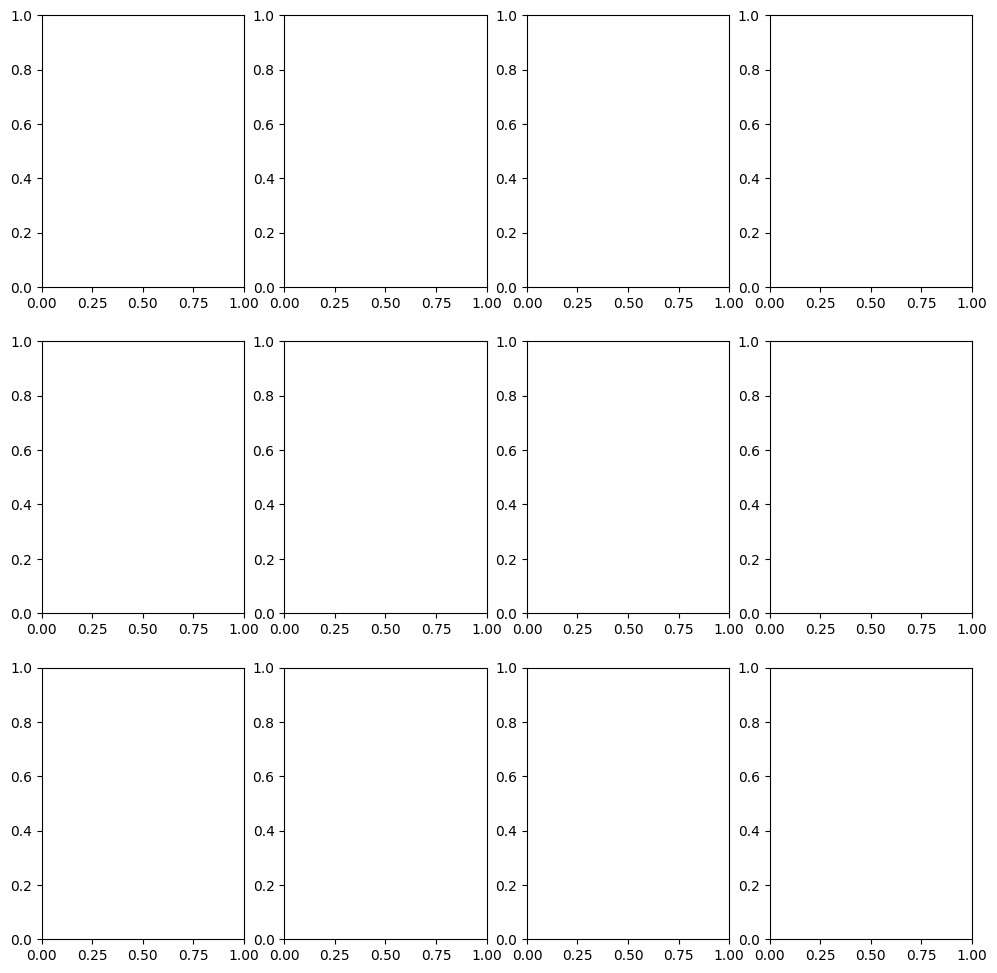

In [136]:
import matplotlib.pyplot as plt

# Define the drivers and models
drivers = ['total_population', 'temperature_change', 'gini_gdppc_eu27', 'time']
models = ['Model 1', 'Model 2', 'Model 3']

# Create the figure and subplots
fig, axs = plt.subplots( len(models), len(drivers), figsize=(12, 12))



# Loop through each subplot

for j, driver in enumerate(drivers):
    for i, model in enumerate(models):
        
        sns.lineplot(x=driver, y='fund_tot_eq_fund_total_impact', data=data, ax=axs[i, j], hue='REGIONS 35 I', palette=['lightgrey']*len(data['REGIONS 35 I'].unique()), legend=False)
        sns.lineplot(x=driver, y='fund_tot_eq_fund_total_impact', data=data, color='grey', linewidth=2, ax=axs[i, j], estimator='mean')

        # Set the title and labels for the current subplot
        #axs[i, j].set_title(f'{driver}')
        axs[i, j].set_xlabel(driver)
        axs[i, j].set_ylabel(f'Total Damage in {model}')

# Adjust the spacing between subplots
plt.tight_layout()
#plt.title('Damage drivers in different models')

# Show the figure
plt.show()